<a href="https://colab.research.google.com/github/ivsantiagocz/Entrega-2/blob/main/EspectroAngularFFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

z= 37.568819115323855
z está en el domino de aplicación de ID de EA


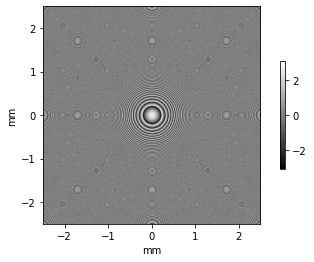

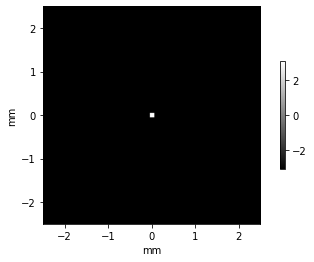

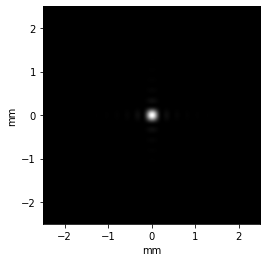

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#importación de librerias necesarias 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from numpy.fft import fft2, fftshift, ifft2 


#máscara rejilla cuadrada
def rmask(a,b,N,c,d):
  t, s = np.ogrid[-a:N-a,-b:N-b]
  mask1 = (t+0*s)<= c
  mask2 = (t+ 0*s)>=-c
  mask3 = (0*t+s)<= d
  mask4 = (0*t+ s)>=-d
  mask=mask1*mask2*mask3*mask4
  array = np.zeros((N,N))
  array[mask] = 1.

  return array
#%%

wl= 633e-6 #longitud de onda
L=5 #medida en milimetros del objeto
N= 1024  #número de particiones del objeto (número de pixeles)
dx= L/N #tamaño de particiones del objeto (tamaño pixel)

z=((N*(dx**2))/wl)-1 #distancia de propagación
ut= rmask(int(N/2),int(N/2),N,10,10) #mascara cuadrada

hh= np.zeros((N,N))*np.exp(-1j*0) #matriz para rellenar de ceros con la función de transferencia 
print ("z=", z) #imprimir el calculo del valor de z

k=(2*np.pi)/wl #vector de onda

#condicional que ayuda a decidir si con las condiciones de z el calculo debe hacerse por espectro angular o por Fresnel
if (z>=(N*(dx)**2)/wl):
    print("z está en el dominio de aplicación de DD de FF")
    for t in range(int(-N/2),int(N/2)): #generación función de transferencia
                for s in range(int(-N/2),int(N/2)):
        
                    h= np.exp(1j*k*((dx*t)**2 + (dx*s)**2)/(2*z)) #la funciòn de transferencia en lo ùnico que cambia en el proceso de calculo fresnel y espectro angular
                    hh[t,s]=h 
                             
    hh=np.fft.fftshift(hh) #centrar función de transferencia
    Ut = ut*hh
                
    U1=np.fft.fft2(Ut)
    Uf=np.fft.fftshift(U1)
    U=abs(Uf)
    UU=U*U #irradiancia
    
    plt.figure(figsize=(7,4))
    plt.imshow(np.angle(hh),cmap='gray',extent=(-L/2,L/2,-L/2,L/2))
    plt.ylabel('mm')
    plt.xlabel('mm')
    plt.show()



    plt.figure(figsize=(7,4))
    plt.imshow((ut),cmap='gray',extent=(-L/2,L/2,-L/2,L/2))
    plt.ylabel('mm')
    plt.xlabel('mm')
    plt.show()

    #zoom=8
    plt.figure(figsize=(7,4))
    #plt.xlim(-1/zoom,1/zoom)
    #plt.ylim(-1/zoom,1/zoom)
    plt.imshow(UU,cmap='gray',extent=(-L/2,L/2,-L/2,L/2))
    plt.ylabel('mm')
    plt.xlabel('mm')
    #plt.grid(True)
    plt.show()
                
else:    #segunda condición del if, a partir de aquì se procede de manera similar a la primera condiciòn
    print("z está en el domino de aplicación de ID de EA")
    for t in range(int(-N/2),int(N/2)):
                for s in range(int(-N/2),int(N/2)):
        
                    h= np.exp(1j*k*z*np.sqrt(1-(wl**2)*((t/(N*dx))**2 + (s/(N*dx))**2))) #la funciòn de transferencia en lo ùnico que cambia en el proceso de calculo fresnel y espectro angular
                    hh[t,s]=h 

    h1=np.fft.fftshift(hh)
    gt=np.fft.fftshift(np.fft.fft2(ut))

                             
    Ut = gt*h1
    
    
    U1=np.fft.ifft2(Ut)
    Uf=np.fft.fftshift(U1)
    UU=abs(U1*U1)
    #UU=U*U
    #I = Image.fromarray(abs(U), 'P')
    plt.figure(figsize=(7,4))
    im1 = plt.imshow(np.angle(h1),cmap='gray',extent=(-L/2,L/2,-L/2,L/2))
    plt.ylabel('mm')
    plt.xlabel('mm')
    plt.colorbar(im1,shrink=0.5)
    plt.show()


    plt.figure(figsize=(7,4))
    im3 = plt.imshow((ut),cmap='gray',extent=(-L/2,L/2,-L/2,L/2))
    plt.ylabel('mm')
    plt.xlabel('mm')
    plt.colorbar(im1,shrink=0.5)
    plt.show()


    #zoom=4
    plt.figure(figsize=(7,4))
    #plt.xlim(-1/zoom,1/zoom)
    #plt.ylim(-1/zoom,1/zoom)
    im2 = plt.imshow(UU,cmap='gray',extent=(-L/2,L/2,-L/2,L/2))
    plt.ylabel('mm')
    plt.xlabel('mm')
    #plt.grid(False)
    plt.show()